#  IMPORTING THE NECESSARY LIBRARIES
The following libraries are very crucial for the training of my machine learning model:

In [7]:
# importing necessary libraties

# importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlb
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
 


In [8]:
# importing the datasets

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [9]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


#   EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


* The train dataset has an extra variable ***bank_account***, which is the target variable.
* There are three **numerical columns** while the rest are **categorical** 
There is therefore need to convert the ***object datta types*** into mumerical format for the machine learning process.

## 1. Univariate analysis

From the above descriptions, I think there are outliers in the ***age_of_respondent, and household_size*** columns due to the large variance in the ***mean*** and the ***maximum values***.

* For the ***age*** column, the ***MEAN == 38.31 AND 38.81*** for the ***test and train*** data respectively, thus the need to handle the outliers.

The availability of outliers may have a negative impact to the overall perfomance of the model.

### Visualising the outliers using boxplots.

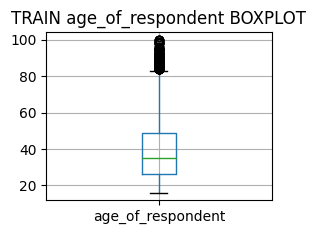

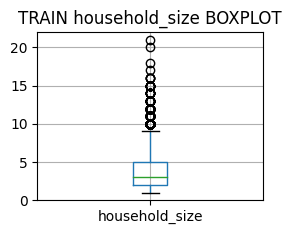

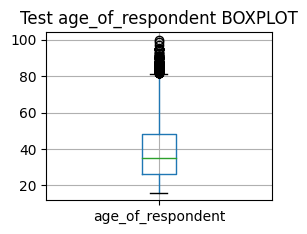

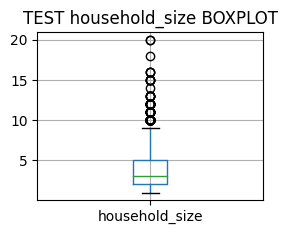

In [12]:
plt.subplot(2, 2, 1)
train.boxplot('age_of_respondent')
plt.title('TRAIN age_of_respondent BOXPLOT')
plt.show()

plt.subplot(2, 2, 2)
train.boxplot('household_size')
plt.title('TRAIN household_size BOXPLOT')
plt.show()

plt.subplot(2, 2, 3)
test.boxplot('age_of_respondent')
plt.title('Test age_of_respondent BOXPLOT')
plt.show()

plt.subplot(2 ,2 ,4)
test.boxplot('household_size')
plt.title('TEST household_size BOXPLOT')
plt.show()

### REPLACING THE OUTLIERS WITH A PREDETERMINED VALUE

Maximum Age = 82
Maximum household_size = 9


In [13]:
max_age = 82
max_hs = 9

# Function to replace the train and test dataset 'age_of_respondent' columns with 82.
def age(x):
    x.age_of_respondent = np.where(
        x.age_of_respondent > max_age, 
        max_age,
        x.age_of_respondent
    )

# Function to replace the train and test datasets 'household_column' with 9.
def house(y):
    y.household_size = np.where(
        y.household_size > max_hs,
        max_hs,
        y.household_size
    )

age(test)
age(train)
house(test)
house(train)


print(f'TEST DATA DESCRIPTION\n {test.describe()}')

print(f'PRINT DATA DESCRIPTION\n {train.describe()}')


TEST DATA DESCRIPTION
                year  household_size  age_of_respondent
count  10086.000000    10086.000000       10086.000000
mean    2016.975907        3.745985          38.253718
std        0.847356        2.105337          16.108186
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          48.000000
max     2018.000000        9.000000          82.000000
PRINT DATA DESCRIPTION
                year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.762795          38.735462
std        0.847371        2.117558          16.317586
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.00000

#### Checking if the outliers are there.

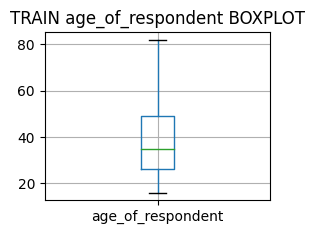

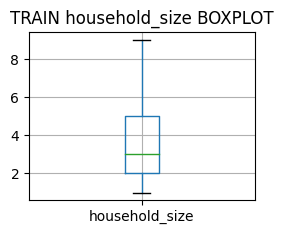

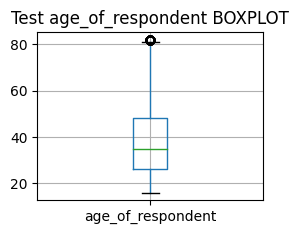

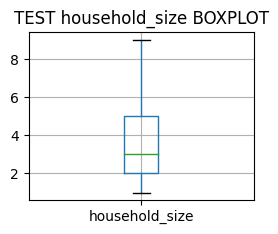

In [14]:
plt.subplot(2, 2, 1)
train.boxplot('age_of_respondent')
plt.title('TRAIN age_of_respondent BOXPLOT')
plt.show()

plt.subplot(2, 2, 2)
train.boxplot('household_size')
plt.title('TRAIN household_size BOXPLOT')
plt.show()

plt.subplot(2, 2, 3)
test.boxplot('age_of_respondent')
plt.title('Test age_of_respondent BOXPLOT')
plt.show()

plt.subplot(2 ,2 ,4)
test.boxplot('household_size')
plt.title('TEST household_size BOXPLOT')
plt.show()

* From the above boxplots, it is evident that we have handled the outliers. We will later look to see how good the model will perform.

## Using PANDAS-PROFILING FOR EDA

After conducting an EDA using pandas_profiling(), I realised the following:
* Most of the data was collected from Rwanda(37.1%), with the least corrected in Uganda(8.9%)
* Most of the data was colllected in 2016(37.1%), with the least in 2017(28.1%)
* Most individuals interviewed lived in the Rural areas(61.4%), with only 38.6% living in the urban areas
* 74.9% of the individuals interviewed had access to cellphones while 25.1% had no access to cellphones.
* The most common household_size was 2.
* More Females(58%) tham Males(42%) were interviewed.
* Most of the interviewees were the heads of household(54.4%) and the **other non-relatives** were the least (0.7%)
* 46.2% of those interviewed lived with their spouses/ were married.
* Most of the interviewees had only a primary level of education. (54.3%)
* Most of the interviewees were self-employed (27.5%)

Also, i noticed there were no missing values in my dataset.

## 2. BIVARIATE ANALYSIS

CROSSTAB
 marital_status  Divorced/Seperated  Dont know  Married/Living together  \
bank_account                                                             
No                            1842          6                     8883   
Yes                            234          2                     1866   

marital_status  Single/Never Married  Widowed  
bank_account                                   
No                              7017     2464  
Yes                              966      244  


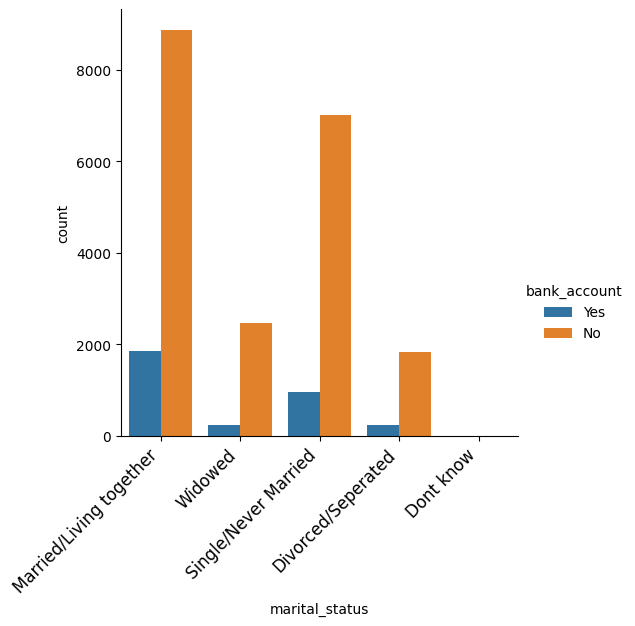

In [15]:
sns.catplot(kind = 'count', x='marital_status', hue='bank_account', data=train)
plt.xticks(rotation=45,
           fontweight='light',
           horizontalalignment='right',
           fontsize='large')

print(f'CROSSTAB\n {pd.crosstab(train.bank_account, train.marital_status)}')

However, it is important to note that those who are married/ Living together had the highest probability(24.4%) of having a bank account, while those who were widowed had the least probability(9.9%).

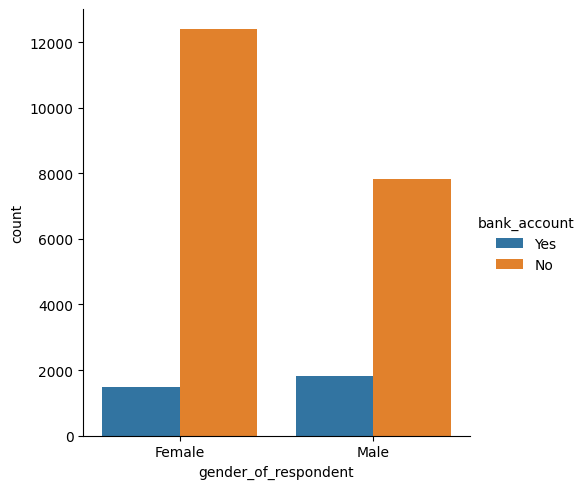

In [16]:
sns.catplot(kind = 'count', x='gender_of_respondent', hue='bank_account', data=train)

* More Males than Females had bank accounts.

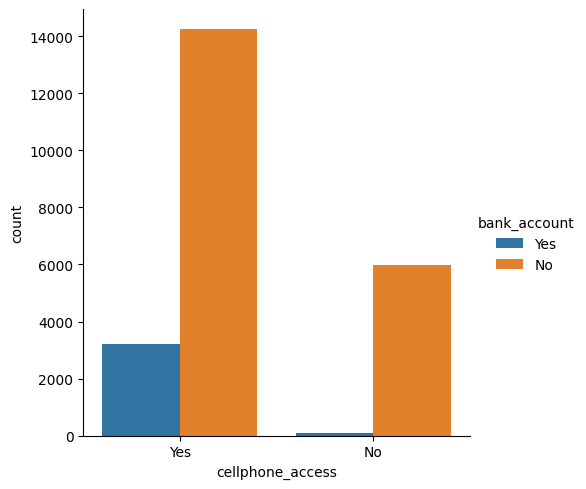

In [17]:
sns.catplot(kind = 'count', x='cellphone_access', hue='bank_account', data=train)

country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object

<AxesSubplot: xlabel='relationship_with_head'>

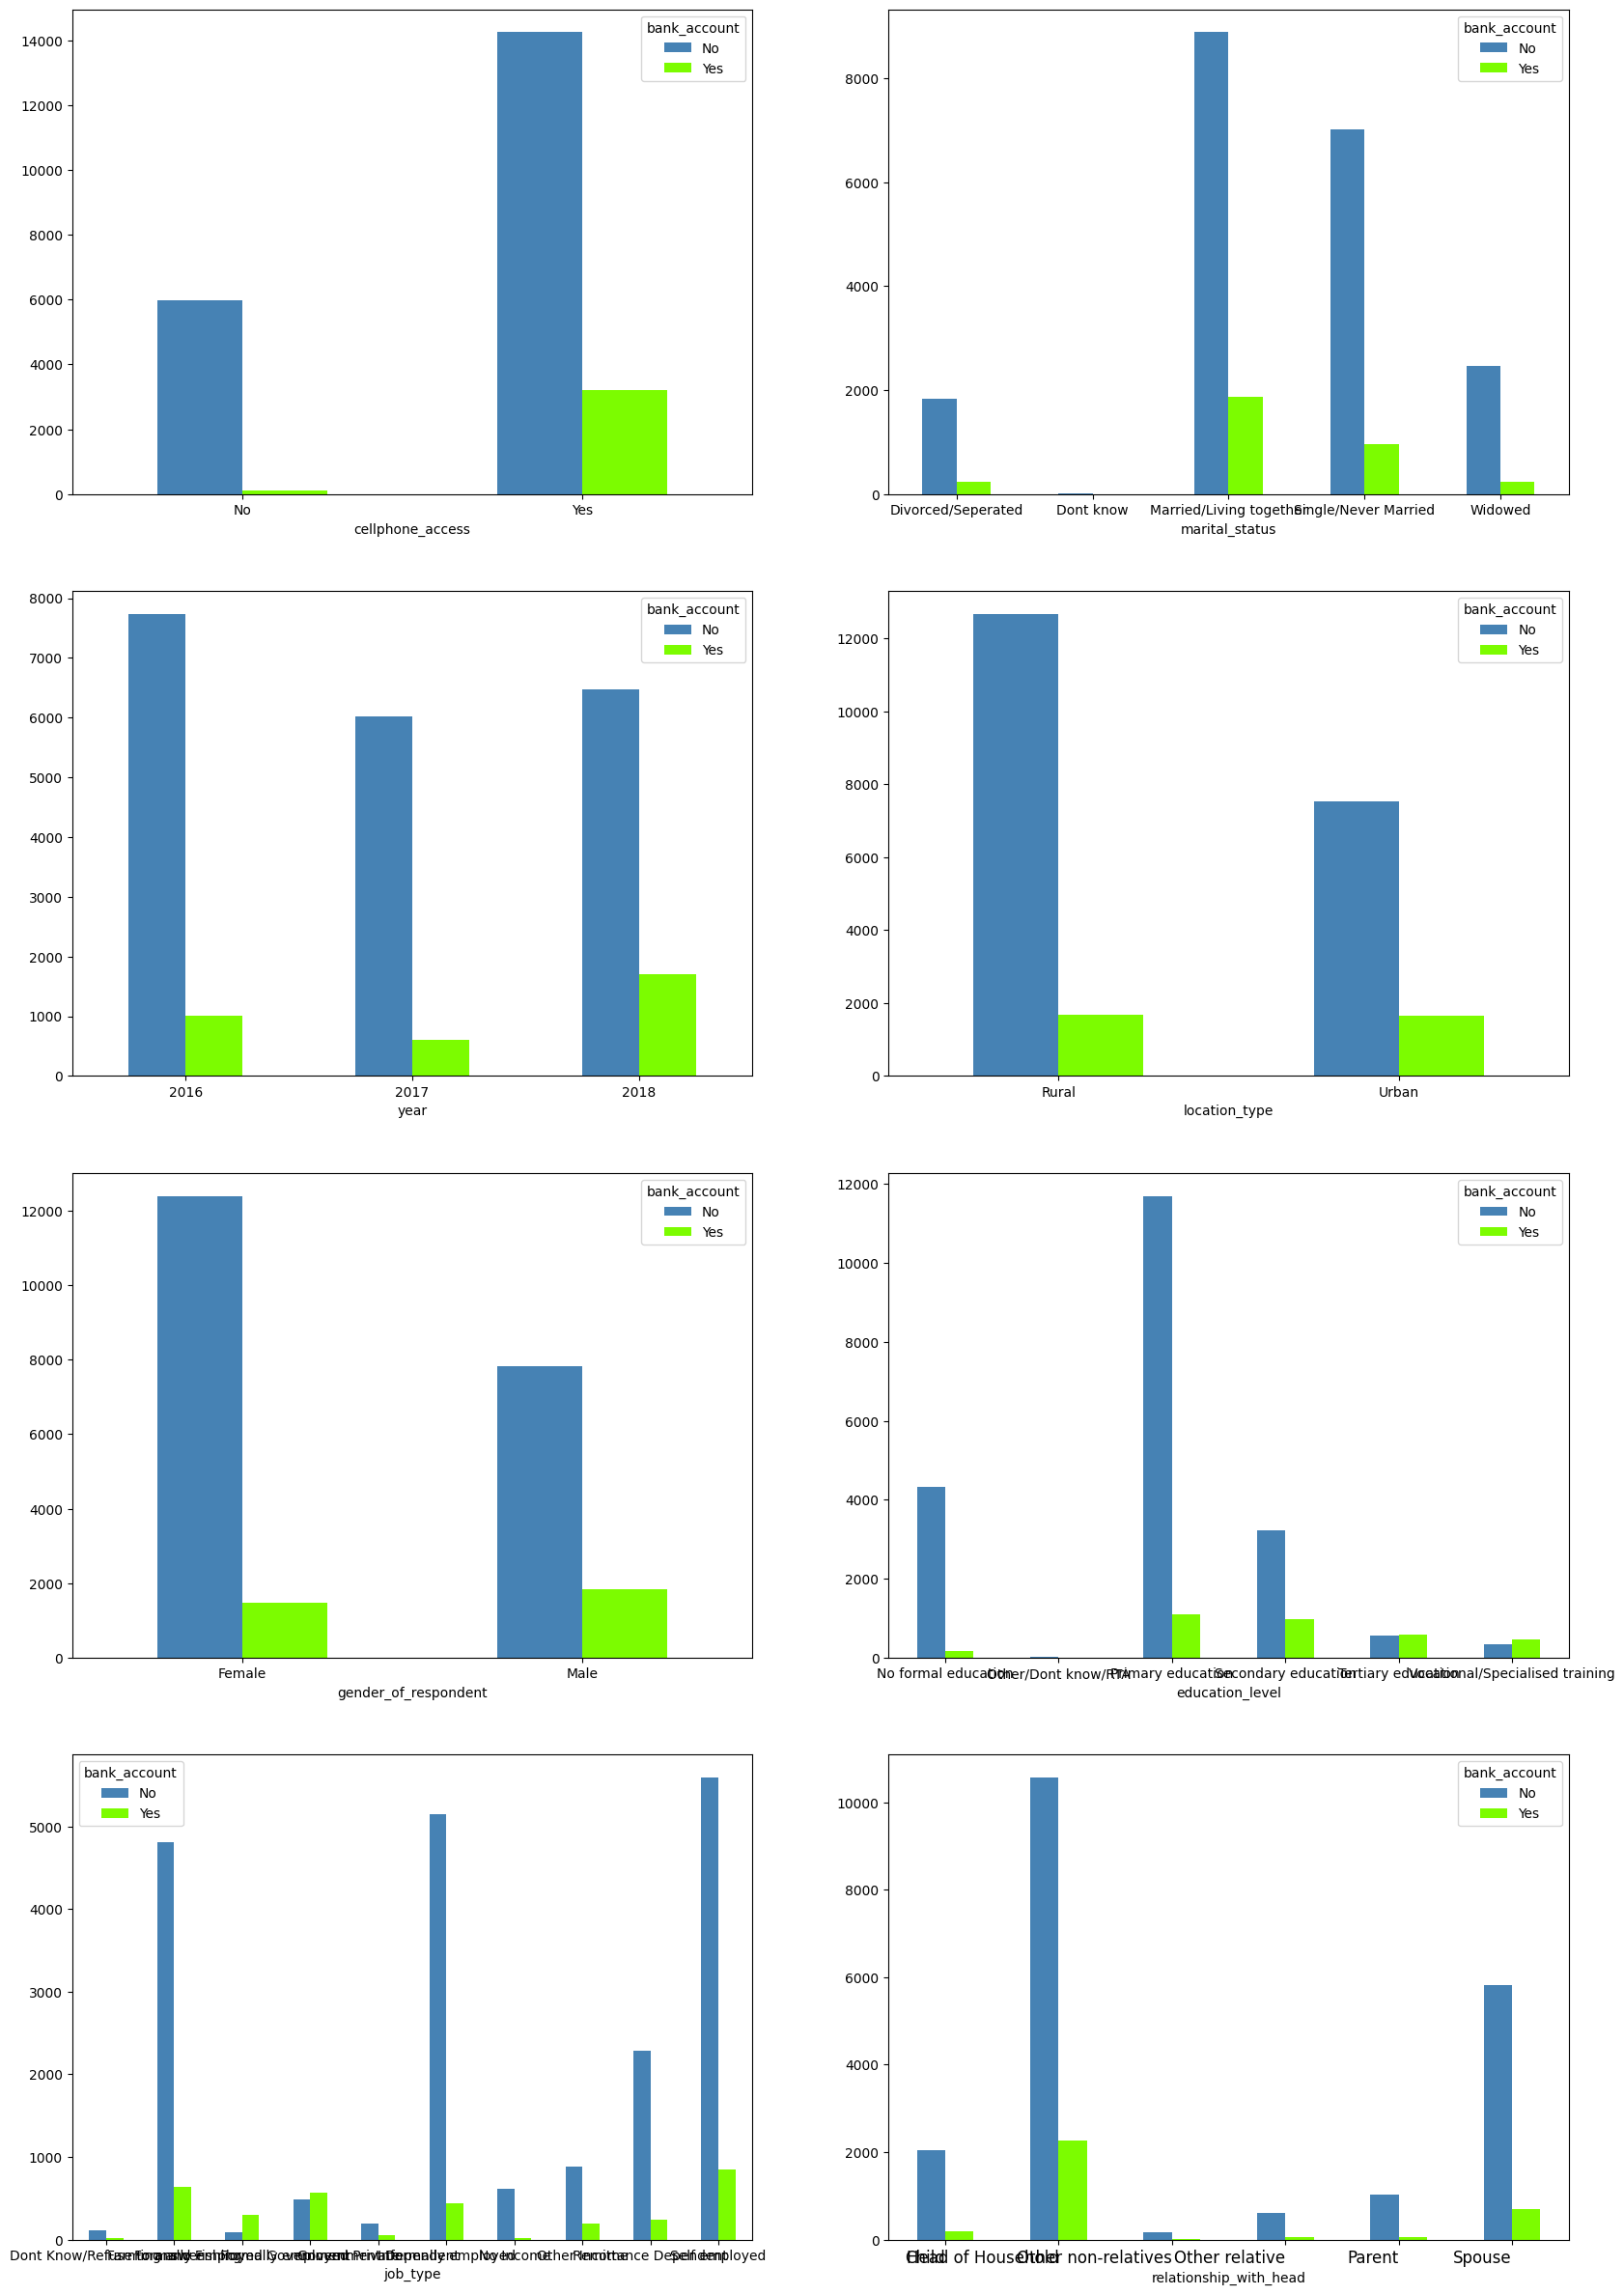

In [18]:
# Creating some crosstab info for some of the remaining columns 
ct1 = pd.crosstab(train.cellphone_access,train.bank_account)
ct2 = pd.crosstab(train.marital_status,train.bank_account)
ct3 = pd.crosstab(train.year,train.bank_account)
ct4 = pd.crosstab(train.location_type,train.bank_account)
ct5 = pd.crosstab(train.gender_of_respondent, train.bank_account)
ct6 = pd.crosstab(train.education_level, train.bank_account)
ct7 = pd.crosstab(train.job_type, train.bank_account)
ct8 = pd.crosstab(train.relationship_with_head, train.bank_account)

# Setting the colors
colors = ["steelblue","lawngreen"]

# Setting up the figure and different axes on the figure
fig,((ax1,ax2),(ax3,ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4,
                                          ncols=2, 
                                          figsize=(20,30))

plt.xticks(rotation=45,
           fontweight='light',
           horizontalalignment='right',
           fontsize='large')

# Plotting each crosstab on a different axis
ct1.plot(kind='bar',ax=ax1,color=colors,rot=0)
ct2.plot(kind='bar',ax=ax2,color=colors,rot=0)
ct3.plot(kind='bar',ax=ax3,color=colors,rot=0)
ct4.plot(kind='bar',ax=ax4,color=colors,rot=0)
ct5.plot(kind='bar',ax=ax5, color=colors, rot=0)
ct6.plot(kind='bar',ax=ax6,color=colors,rot=0)
ct7.plot(kind='bar',ax=ax7,color=colors,rot=0)
ct8.plot(kind='bar',ax=ax8,color=colors,rot=0)



# DATA PREPARATION FOR MACHINE LEARNING
I will first convert all the categorical columns into numerical form for training the machine learning model.

For this exercise, I will use:
* LabelEncoder
* OneHotEncoding

In [19]:
# Using label encoder to convert the target column into 1 and 0. 

le = LabelEncoder()
train.bank_account = le.fit_transform(train['bank_account'])

# Separating the train dataset from the target column.

X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

In [20]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             'country']
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data   

preprocessed_train = preprocessing_data(X_train)
preprocessed_test = preprocessing_data(test)   


In [21]:
# splitting the data into train and test sets.

X_Train, X_test, y_Train, y_Test = train_test_split(preprocessed_train, y_train, stratify=y_train, train_size=0.1, random_state=42)

50% of the data will be uses for evaluation purposes. The ***stratify=y_train*** ensures that there is a balance of the classes.

# TRAINING THE MODEL USING DIFFERENT CLASSIFIERS.

For the training of the model, I will use the following classifiers:
* K Nearest Neighbours
* XGBClassifier
* RandomForestClassifier
* AdaClassifier
* LGBMClassifier
* CatBoostClassifier

In [22]:

c = 10
#creating an array of classifiers

classifiers = { 
    'Linear SVC': SVC(kernel='linear', C=c, probability=True, random_state=0),
    #applying the K-Neighbours classifier
    'KNN classifier': KNeighborsClassifier(c),
    #applying Support-Vector Machine(SVM)
    'SVC': SVC(),
    #using Ensemble Classifiers(Random Forest and AdaBoost)
    'RFST': RandomForestClassifier(n_estimators=100), #n_estimators = 100 means the RandomForestClassifier will create 100 decision trees
    'ADA': AdaBoostClassifier(n_estimators=100),
    #Using XGBClassifier
    'XGBClassifier':XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5),
    #Using CatBoostClassifier()
    'CATBOOST CLASSIFIER':CatBoostClassifier() 

}


In [23]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(preprocessed_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_Test, y_pred)

    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy*100))
    print(classification_report(y_Test, y_pred))

Accuracy (train) for Linear SVC: 87.4% 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18191
           1       0.62      0.27      0.37      2981

    accuracy                           0.87     21172
   macro avg       0.76      0.62      0.65     21172
weighted avg       0.85      0.87      0.85     21172

Accuracy (train) for KNN classifier: 89.6% 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     18191
           1       0.78      0.36      0.49      2981

    accuracy                           0.90     21172
   macro avg       0.84      0.67      0.72     21172
weighted avg       0.89      0.90      0.88     21172

Accuracy (train) for SVC: 89.3% 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     18191
           1       0.76      0.35      0.48      2981

    accuracy                           0.89     21172
   macro av

In [24]:
#SVC = SVC()
RFST = RandomForestClassifier(n_estimators=100)
ADA = AdaBoostClassifier(n_estimators=100)
#Linear_SVC = SVC(kernel='linear', C=c, probability=True, random_state=0)
#XGBClassifier=XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)
CATBOOST_CLASSIFIER=CatBoostClassifier()

def prediction(classifier):

    classifier.fit(preprocessed_train, y_train)
    
    Y_PRED = RFST.predict(X_test)
    accuracy = accuracy_score(y_Test, Y_PRED)
    print('Accuracy for RandomForestClassifier: ', accuracy*100)
    print(classification_report(y_Test, Y_PRED))

    # plotting the confusion matrix for the classifier

    cm = confusion_matrix(Y_PRED, y_Test)
    print(cm)
    


prediction(RFST)



Accuracy for RandomForestClassifier:  97.85093519743057
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18191
           1       0.97      0.88      0.92      2981

    accuracy                           0.98     21172
   macro avg       0.97      0.94      0.95     21172
weighted avg       0.98      0.98      0.98     21172

[[18103   367]
 [   88  2614]]


In [25]:
test['bank_account'] = RFST.predict(preprocessed_test)

In [26]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [27]:
submission.to_csv('sub2.csv', index=False)